## word2vec3

In [11]:
import jieba
#导入文件
import matplotlib
import matplotlib.pyplot as plt
import re
from gensim.models import Word2Vec
import numpy as np
from sklearn.decomposition import PCA

### 读入文件

In [5]:
f = open("sanguo.txt","r",encoding='utf-8')
lines = []
for line in f:
    #jieba分词
    temp = jieba.lcut(line)
    word = []
    for w in temp:
        w = re.sub("[\s+\.\!\/_,$%^*(+\"\'””《》]+|[+——！，。？、~@#￥%……&*（）：；‘]+","",w)
        if len(w) > 0:
            word.append(w)
    if len(word) > 0:
        lines.append(word)
print(lines[0:6])


[['三国演义', '上卷'], ['罗贯中'], ['滚滚', '长江', '东', '逝水', '浪花', '淘尽', '英雄', '是非成败', '转头', '空', '青山', '依旧', '在', '几度', '夕阳红'], ['白发', '渔樵', '江渚上', '惯看', '秋月春风', '一壶', '浊酒', '喜相逢', '古今', '多少', '事', '都', '付笑谈', '中'], ['--', '调寄', '临江仙'], ['第一回', '宴', '桃园', '豪杰', '三', '结义', '斩', '黄巾', '英雄', '首', '立功']]


### 训练模型

In [14]:
model = Word2Vec(lines,vector_size=20,window=4,min_count=1,sg=1,negative=10,epochs=7)
print("诸葛亮的词向量：\n",model.wv.get_vector("诸葛亮"))
print("与诸葛亮最相关的30个词语：\n")
model.wv.most_similar("诸葛亮",topn=30)

诸葛亮的词向量：
 [ 0.5022926   0.14572677  0.28254434  0.20538291 -0.19402152 -0.21133746
  1.0256319   0.40225044 -0.31861296 -0.2721165   0.16353111 -0.3474823
  0.0789463  -0.3780636  -0.23178561  0.39135566  1.2695278  -1.049218
 -0.82858056 -1.2124816 ]
与诸葛亮最相关的30个词语：



[('可速', 0.9484416246414185),
 ('故来', 0.9476280212402344),
 ('之计', 0.9472638964653015),
 ('常有', 0.9454100131988525),
 ('旦夕', 0.9436413049697876),
 ('切不可', 0.9401183724403381),
 ('机会', 0.9400280117988586),
 ('迟', 0.9399058818817139),
 ('入寇', 0.9394586682319641),
 ('荆襄', 0.937766969203949),
 ('武侯', 0.9360822439193726),
 ('祸', 0.9348596930503845),
 ('不降', 0.9341980218887329),
 ('无益', 0.9341628551483154),
 ('不难', 0.9330332279205322),
 ('吞并', 0.9325733780860901),
 ('所害', 0.9323662519454956),
 ('奸计', 0.9323316812515259),
 ('若得', 0.9317581653594971),
 ('早晚', 0.9300686717033386),
 ('未必', 0.9299224019050598),
 ('势', 0.9297100305557251),
 ('统曰', 0.9292258024215698),
 ('不易', 0.928924560546875),
 ('助', 0.928367555141449),
 ('表曰', 0.9280115962028503),
 ('今为', 0.9278813004493713),
 ('之后', 0.927805483341217),
 ('既有', 0.9274213910102844),
 ('同盟', 0.9271187782287598)]

### 降维

In [17]:
rawWord2vec=[]
ind2={}
for i,w in enumerate(model.wv.index_to_key):
    rawWord2vec.append(model.wv[w])
    ind2[w]=i
rawWord2vec = np.array(rawWord2vec)
X_reduced = PCA(n_components=2).fit_transform(rawWord2vec)

In [18]:
X_reduced

array([[ 1.0517056 , -1.2897061 ],
       [ 0.8896081 , -0.70999795],
       [ 0.86414593, -0.97948945],
       ...,
       [-0.19723909, -0.04154975],
       [-0.31309214,  0.02382068],
       [-0.51173526,  0.00159124]], dtype=float32)

### 可视化

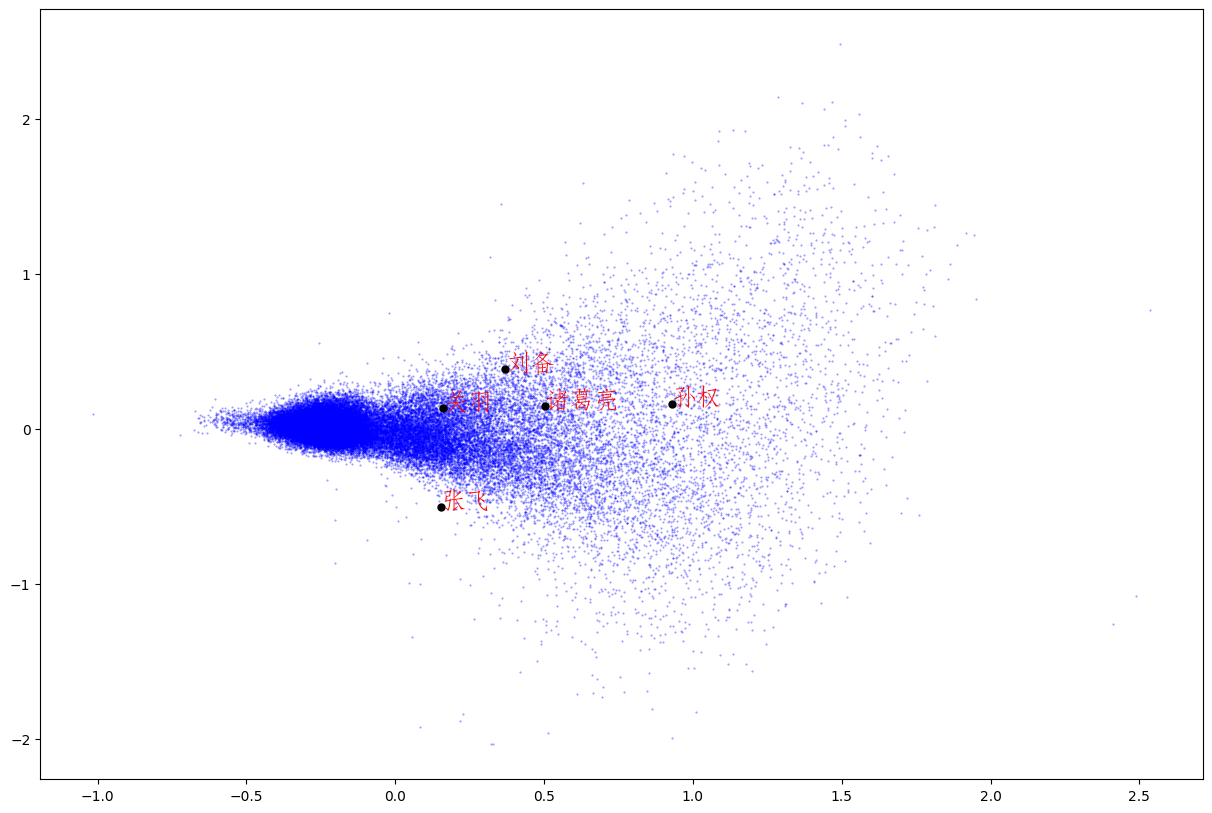

In [24]:
fig = plt.figure(figsize=(15,10))

ac = fig.gca()

ac.plot(X_reduced[:,0],X_reduced[:,1],'.',alpha=0.4,color='blue',markersize=1)

fontproperties = matplotlib.font_manager.FontProperties(fname="华文仿宋.ttf",size=18)

words = ['诸葛亮','孙权','刘备','张飞','关羽']
for w in words:
    if w in ind2:
        x = ind2[w]
        xx = rawWord2vec[x]
        plt.plot(xx[0],xx[1],'.',alpha=1,color='black',markersize=10)
        plt.text(xx[0],xx[1],w,alpha=1,fontproperties = fontproperties,color='red')